<a href="https://colab.research.google.com/github/Samson-Antony/final-project/blob/integrate/integraion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#run this block for 10th

sec=10
marks=[(65,75,95,98,99)]

course=''

In [0]:
#run this block for 12th

sec=12
marks=[(65,75,95,98,99,89,0,0,0,0)]

course='B.Sc. Zoology'

In [4]:
from google.colab import files
uploaded = files.upload()

Saving recommendation-rating.csv to recommendation-rating.csv
Saving recommendation-course-list.csv to recommendation-course-list.csv
Saving clg-ratings.csv to clg-ratings.csv
Saving clg-list.csv to clg-list.csv
Saving 12th-naivebayes.csv to 12th-naivebayes.csv
Saving 10th-recommendation-rating.csv to 10th-recommendation-rating.csv
Saving 10th-recommendation-list.csv to 10th-recommendation-list.csv
Saving 10th-naivebayes.csv to 10th-naivebayes.csv


In [0]:
import pandas as pd 
if sec==12 :
  data = pd.read_csv("12th-naivebayes.csv") #change file name to a valid one
else:
  data = pd.read_csv("10th-naivebayes.csv") #change file name to a valid one

In [0]:
X=data.iloc[:,:-1]

In [0]:
y= data.iloc[:,-1]

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2) 

In [39]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = gnb.predict(X_test) 

In [41]:
from sklearn import metrics 

print("Gaussian Naive Bayes model accuracy(in %) of predicting course based on mark:", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %) of predicting course based on mark: 13.90728476821192


In [0]:
y_pred = gnb.predict(marks)

In [43]:
y_pred

array(['naval_architecture_and_ocean_engineering'], dtype='<U41')

In [0]:
if sec==12:
  df = pd.read_csv("recommendation-rating.csv")
  course_titles = pd.read_csv('recommendation-course-list.csv')
else :
  df = pd.read_csv("10th-recommendation-rating.csv")
  course_titles = pd.read_csv('10th-recommendation-list.csv')

In [0]:
data = pd.merge(df, course_titles, on='Item_id') 

In [0]:
ratings = pd.DataFrame(data.groupby('Course')['rating'].mean())  
ratings['num of ratings'] = pd.DataFrame(data.groupby('Course')['rating'].count()) 

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('dark') 
%matplotlib inline 

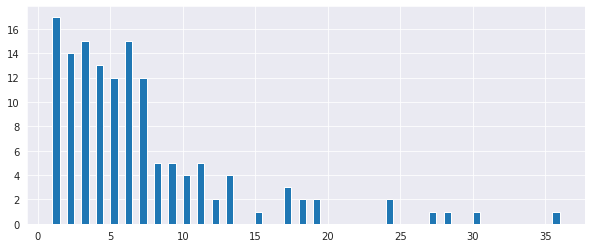

In [48]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
ratings['num of ratings'].hist(bins = 70) 

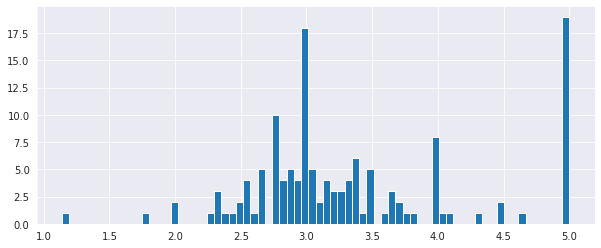

In [49]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4))  
ratings['rating'].hist(bins = 70) 

In [0]:
# Sorting values according to  
# the 'num of rating column' 
coursemat = data.pivot_table(index ='userid', 
              columns ='Course', values ='rating') 

In [0]:
Course_ratings = coursemat[y_pred[0]] #course from navi base

In [67]:
# analysing correlation with similar movies 
similar_course = coursemat.corrwith(Course_ratings) 
# similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
  
corr_course = pd.DataFrame(similar_course, columns =['Correlation']) 
corr_course.dropna(inplace = True) 

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [68]:
corr_course.sort_values("Correlation", axis=0, 
                 ascending=False, inplace=True) 
fav_course=corr_course.loc[corr_course.Correlation>0]
fav_course

,Correlation
Course,
naval_architecture_and_ocean_engineering,1.00000
marine_engineering,0.72341


In [69]:
dis_course=corr_course.loc[corr_course.Correlation<0]
dis_course 

,Correlation
Course,
industrial_engineering,-1.0
mechanical_engineering,-1.0


In [0]:
#runing flow for the above

#enter mark
#navi base
#10>group 12>course(based on mark)
#course>recommendation system(set of course)(step 1)
#additional feature of couser that he might have failure rate is also added

In [0]:
#anto add below recommendation system code

In [0]:
#work still to do

#recomendation system for 12,10(step 2)
#manipulate set of course from step 1 and 2

In [33]:
corr_course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
Correlation    0 non-null float64
dtypes: float64(1)
memory usage: 0.0+ bytes


In [0]:
corr_course=corr_course.loc[corr_course.Correlation>0]

In [0]:
corr_course

,Correlation
Course,
bsc_chemistry,1.0


In [0]:
n=corr_course.size
n


1

In [0]:
mark_sub=[]

In [0]:
for i in range (0,n):
  mark_sub.append(corr_course.index[i])

In [0]:
mark_sub

['bsc_chemistry']

In [0]:
# Similar movies like starwars corr_starwars.sort_values('Correlation', ascending = False).head(10) 
# corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
# corr_starwars.head() 
  
# corr_starwars[corr_starwars['num of ratings']>10].sort_values('Correlation', ascending = False).head() 